# Import bibliotek

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
SEED = 17
import warnings
warnings.filterwarnings('ignore')

from utils.Isolation_Forest_Optimization import IsolationForestOptimizer

# Usuwanie wartości odstających

$\text{Do detekcji wartości odstających wykorzystamy Isolation Forest.}$<p>
$\text{Isolation Forest to nienadzorowany algorytm uczenia maszynowego wykorzystywany do wykrywania anomalii/wartości odstających.}$<p>
$\text{Algorytm opiera się na założeniu, że anomalie są łatwiejsze do wyizolowania niż normalne obserwacje.}$<p>
$\text{Dzieje się tak, ponieważ anomalie różnią się od większości danych i jest bardziej prawdopodobne, że zostaną wyizolowane na wczesnych etapach partycjonowania.}$<p>
$\text{Poniższy obrazek przedstawia główną ideę algorytmu Isolation Forest:}$

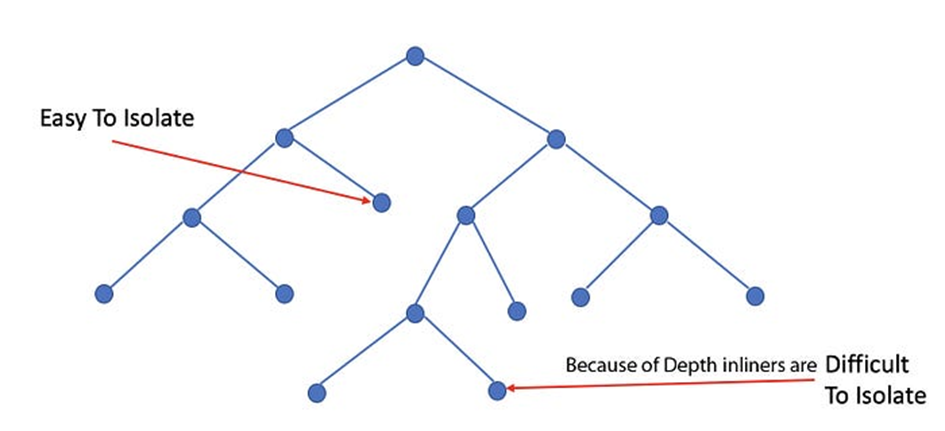

$\text{Ważnym parametrem dla tego algorytmu jest contamination, który określa procent obserwacji zbioru danych, które są uznawane za wartości odstające.}$<p>
$\text{Ponieważ nie znamy rzeczywistej liczby wartości odstających, przeprowadzimy tuning tego parametru.}$<p>
$\text{Ponadto postaramy znaleźć optymalną wartość dla parametru n\_estimators, który określa liczbę drzew w lesie.}$<p>
$\text{Do optymalizacji wykorzystano bibliotekę Optuna.}$

## Wczytanie zbioru danych

In [2]:
parent_dir = os.path.dirname(os.getcwd())
train_data = pd.read_csv(os.path.join(parent_dir, 'data//train_data.csv'), index_col=0)
test_data = pd.read_csv(os.path.join(parent_dir, 'data//test_data.csv'), index_col=0)
target = "stars"
X_train = train_data.drop(target, axis=1)
y_train = train_data[target]
X_test = test_data.drop(target, axis=1)
y_test = test_data[target]

## 1. Regresja liniowa

In [3]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = LinearRegression(), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
LR_outliers_indices, LR_ratio_of_outliers, LR_cv_scores, LR_test_score, LR_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:35:21,170] A new study created in memory with name: no-name-42634190-74ef-4c14-8db9-0440e4a4dd10
[I 2024-04-13 21:35:22,602] Trial 0 finished with value: 0.2266973385401035 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.2266973385401035.
[I 2024-04-13 21:35:23,829] Trial 1 finished with value: 0.22630034032515683 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.22630034032515683.
[I 2024-04-13 21:35:26,292] Trial 2 finished with value: 0.22706266375524642 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.22630034032515683.
[I 2024-04-13 21:35:28,402] Trial 3 finished with value: 0.2268636862138686 and parameters: {'n_estimators': 146, 'conta

## 2. Lasso

In [4]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = Lasso(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
Lasso_outliers_indices, Lasso_ratio_of_outliers, Lasso_cv_scores, Lasso_test_score, Lasso_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:38:14,775] A new study created in memory with name: no-name-e820a991-37ac-4914-b9a6-74f2f37d1e5c
[I 2024-04-13 21:38:16,255] Trial 0 finished with value: 0.2939196272282297 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.2939196272282297.
[I 2024-04-13 21:38:17,499] Trial 1 finished with value: 0.2937397866767083 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.2937397866767083.
[I 2024-04-13 21:38:20,044] Trial 2 finished with value: 0.2941052532263382 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.2937397866767083.
[I 2024-04-13 21:38:22,270] Trial 3 finished with value: 0.2940151156094566 and parameters: {'n_estimators': 146, 'contamina

## 3. Ridge

In [5]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = Ridge(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
Ridge_outliers_indices, Ridge_ratio_of_outliers, Ridge_cv_scores, Ridge_test_score, Ridge_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:40:44,655] A new study created in memory with name: no-name-8e6b8e79-96e3-4a9b-abb4-30ee181ace8c
[I 2024-04-13 21:40:46,125] Trial 0 finished with value: 0.2266559483025709 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.2266559483025709.
[I 2024-04-13 21:40:47,343] Trial 1 finished with value: 0.22628922999450105 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.22628922999450105.
[I 2024-04-13 21:40:49,835] Trial 2 finished with value: 0.2269731276736387 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.22628922999450105.
[I 2024-04-13 21:40:52,054] Trial 3 finished with value: 0.22679191946614852 and parameters: {'n_estimators': 146, 'conta

## 4. ElasticNet

In [6]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = ElasticNet(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
Elastic_outliers_indices, Elastic_ratio_of_outliers, Elastic_cv_scores, Elastic_test_score, Elastic_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:43:39,375] A new study created in memory with name: no-name-8cf6ab37-9613-4bfd-b27f-21bc710527d8
[I 2024-04-13 21:43:40,760] Trial 0 finished with value: 0.2939384593686539 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.2939384593686539.
[I 2024-04-13 21:43:41,896] Trial 1 finished with value: 0.29371292264439885 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.29371292264439885.
[I 2024-04-13 21:43:44,269] Trial 2 finished with value: 0.29415522312844505 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.29371292264439885.
[I 2024-04-13 21:43:46,339] Trial 3 finished with value: 0.29405413510679984 and parameters: {'n_estimators': 146, 'cont

## 5. SVM Regressor

In [7]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = SVR(), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
SVM_outliers_indices, SVM_ratio_of_outliers, SVM_cv_scores, SVM_test_score, SVM_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:46:37,398] A new study created in memory with name: no-name-e57a6cfc-a330-44a9-a83a-c1e3243765c7
[I 2024-04-13 21:46:41,750] Trial 0 finished with value: 0.29598680381724723 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.29598680381724723.
[I 2024-04-13 21:46:46,013] Trial 1 finished with value: 0.29591761615924944 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.29591761615924944.
[I 2024-04-13 21:46:51,256] Trial 2 finished with value: 0.2959254934809686 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.29591761615924944.
[I 2024-04-13 21:46:56,193] Trial 3 finished with value: 0.2959243179236865 and parameters: {'n_estimators': 146, 'cont

## 6. Decision Tree

In [8]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = DecisionTreeRegressor(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
DT_outliers_indices, DT_ratio_of_outliers, DT_cv_scores, DT_test_score, DT_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:54:05,747] A new study created in memory with name: no-name-49fd4f10-d9ba-4135-ba24-81c532919306
[I 2024-04-13 21:54:07,325] Trial 0 finished with value: 0.31204551959519 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.31204551959519.
[I 2024-04-13 21:54:08,691] Trial 1 finished with value: 0.3084624547392957 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.3084624547392957.
[I 2024-04-13 21:54:11,347] Trial 2 finished with value: 0.3055059952699035 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 2 with value: 0.3055059952699035.
[I 2024-04-13 21:54:13,722] Trial 3 finished with value: 0.3077794002818105 and parameters: {'n_estimators': 146, 'contamination

## 7. Random Forest

In [9]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = RandomForestRegressor(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
RF_outliers_indices, RF_ratio_of_outliers, RF_cv_scores, RF_test_score, RF_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 21:56:47,005] A new study created in memory with name: no-name-c10075e2-6d93-4ad5-a712-c0aff6219ff9
[I 2024-04-13 21:57:05,756] Trial 0 finished with value: 0.21275355335386764 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.21275355335386764.
[I 2024-04-13 21:57:25,110] Trial 1 finished with value: 0.21111205896996693 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.21111205896996693.
[I 2024-04-13 21:57:44,539] Trial 2 finished with value: 0.2135936600058359 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.21111205896996693.
[I 2024-04-13 21:58:03,660] Trial 3 finished with value: 0.2137201002733537 and parameters: {'n_estimators': 146, 'cont

## 8. LightGBM

In [10]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = LGBMRegressor(random_state=SEED, verbosity=-1), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
LGBM_outliers_indices, LGBM_ratio_of_outliers, LGBM_cv_scores, LGBM_test_score, LGBM_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 22:29:50,329] A new study created in memory with name: no-name-6385823a-ed6b-4f76-948e-1ed2834c0c4c
[I 2024-04-13 22:29:52,248] Trial 0 finished with value: 0.2004351055357842 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.2004351055357842.
[I 2024-04-13 22:29:53,906] Trial 1 finished with value: 0.19837713436922216 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.19837713436922216.
[I 2024-04-13 22:29:56,886] Trial 2 finished with value: 0.1998213553377001 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.19837713436922216.
[I 2024-04-13 22:29:59,549] Trial 3 finished with value: 0.19902065681550415 and parameters: {'n_estimators': 146, 'conta

## 9. XGBoost

In [11]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = XGBRegressor(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
XGB_outliers_indices, XGB_ratio_of_outliers, XGB_cv_scores, XGB_test_score, XGB_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 22:34:36,353] A new study created in memory with name: no-name-d968f55a-3706-4937-a842-4b181ab0268e
[I 2024-04-13 22:34:38,554] Trial 0 finished with value: 0.20892884255337368 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 0.20892884255337368.
[I 2024-04-13 22:34:40,542] Trial 1 finished with value: 0.20523487332515447 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.20523487332515447.
[I 2024-04-13 22:34:43,840] Trial 2 finished with value: 0.21034389610669363 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 1 with value: 0.20523487332515447.
[I 2024-04-13 22:34:46,819] Trial 3 finished with value: 0.20685013932548252 and parameters: {'n_estimators': 146, 'co

## 10. MLP Regressor

In [12]:
isolation_forest_optimizer = IsolationForestOptimizer(algorithm = MLPRegressor(random_state=SEED), metric = "rmse", cv=KFold(n_splits=5, shuffle=True, random_state=SEED), n_trials=100)
MLP_outliers_indices, MLP_ratio_of_outliers, MLP_cv_scores, MLP_test_score, MLP_isolation_forest_best_params = isolation_forest_optimizer.optimize(X_train, y_train, X_test, y_test)

[I 2024-04-13 22:40:10,138] A new study created in memory with name: no-name-75c00af5-1730-46e2-8fa8-1e91c399a761
[I 2024-04-13 22:40:19,825] Trial 0 finished with value: 1.5597585554624365 and parameters: {'n_estimators': 94, 'contamination': 0.053058675560529414, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 1.5597585554624365.
[I 2024-04-13 22:40:26,636] Trial 1 finished with value: 28.0479750304405 and parameters: {'n_estimators': 78, 'contamination': 0.006790035819129137, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 1.5597585554624365.
[I 2024-04-13 22:40:35,815] Trial 2 finished with value: 21.67392776843393 and parameters: {'n_estimators': 168, 'contamination': 0.06563335217758555, 'bootstrap': True, 'n_jobs': -1, 'random_state': 17}. Best is trial 0 with value: 1.5597585554624365.
[I 2024-04-13 22:40:44,918] Trial 3 finished with value: 15.916470156566964 and parameters: {'n_estimators': 146, 'contaminatio

# Podsumowanie

$\text{W tej sekcji zestawiono wyniki wszystkich przeprowadzonych eksperymentów.}$

In [13]:
LR_base_score = 0.23332
Lasso_base_score = 0.29881
Ridge_base_score = 0.23314
Elastic_base_score = 0.29879
SVM_base_score = 0.29944
DT_base_score = 0.31403
RF_base_score = 0.21355
LGBM_base_score = 0.19964
XGB_base_score = 0.2029
MLP_base_score = 283.28169
algorithms_names = ["Linear Regression", "Lasso", "Ridge", "Elastic Net", "SVM", "Decision Tree", "Random Forest", "LGBM", "XGB", "MLP"]
ratios_of_outliers = [LR_ratio_of_outliers, Lasso_ratio_of_outliers, Ridge_ratio_of_outliers, Elastic_ratio_of_outliers, SVM_ratio_of_outliers, DT_ratio_of_outliers, RF_ratio_of_outliers, LGBM_ratio_of_outliers, XGB_ratio_of_outliers, MLP_ratio_of_outliers]
cv_scores = [LR_cv_scores, Lasso_cv_scores, Ridge_cv_scores, Elastic_cv_scores, SVM_cv_scores, DT_cv_scores, RF_cv_scores, LGBM_cv_scores, XGB_cv_scores, MLP_cv_scores]
test_scores = [LR_test_score, Lasso_test_score, Ridge_test_score, Elastic_test_score, SVM_test_score, DT_test_score, RF_test_score, LGBM_test_score, XGB_test_score, MLP_test_score]
base_scores = [LR_base_score, Lasso_base_score, Ridge_base_score, Elastic_base_score, SVM_base_score, DT_base_score, RF_base_score, LGBM_base_score, XGB_base_score, MLP_base_score]
results = pd.DataFrame({"algorithm": algorithms_names, "ratio_of_outliers": ratios_of_outliers, "cv_scores": cv_scores, "base_scores": base_scores, "test_scores": test_scores})
results = results.set_index("algorithm")
results.style.background_gradient(cmap='Blues', axis=0)

,ratio_of_outliers,cv_scores,base_scores,test_scores
algorithm,,,,
Linear Regression,0.000541,0.225964,0.233320,0.233324
Lasso,0.017316,0.291862,0.298810,0.298810
Ridge,0.003608,0.225904,0.233140,0.233196
Elastic Net,0.004329,0.293502,0.298790,0.298794
SVM,0.026876,0.293316,0.299440,0.299361
Decision Tree,0.056999,0.303831,0.314030,0.306281
Random Forest,0.002886,0.211690,0.213550,0.212914
LGBM,0.002706,0.197112,0.199640,0.199568
XGB,0.002345,0.202916,0.202900,0.206001


$\text{Jak widać różnice między wynikiem bazowym a tym po usunięciu wartości odstających nie są duże.}$<p>
$\text{Rezultaty nie są jednoznaczne, w przypadku niektórych algorytmów wyniki poprawiły się (np.: Decision Tree), natomiast dla innych uległy pogorszeniu (np.: XGB).}$<p>
$\text{W przypadku algorytmów, dla których odnotowano poprawę informacje na temat indeksów obserwacji, które zostały uznane za wartości odstające zostaną wykorzystane w kolejnych sekacjach.}$

In [14]:
print("Indeksy do usunięcia w kolejnych sekcjach:")
print("SVM: {}".format(SVM_outliers_indices))
print("Decision Tree: {}".format(DT_outliers_indices))
print("Random Forest: {}".format(RF_outliers_indices))
print("LGBM: {}".format(LGBM_outliers_indices))
print("MLP: {}".format(MLP_outliers_indices))

Indeksy do usunięcia w kolejnych sekcjach:
SVM: [796, 1347, 5175, 2642, 1971, 4685, 3413, 562, 2136, 459, 2373, 6054, 1975, 1304, 2262, 4858, 251, 133, 370, 5922, 4981, 2431, 6046, 115, 2868, 4147, 2765, 2797, 3350, 4301, 2128, 3415, 5551, 1367, 6620, 23, 1568, 1010, 1966, 2499, 1020, 5249, 66, 904, 938, 4837, 5653, 2554, 755, 950, 4655, 1408, 1378, 1900, 6094, 587, 4592, 2839, 4339, 1814, 372, 3745, 2838, 3148, 5316, 5024, 2027, 4414, 1466, 629, 5909, 591, 4879, 1217, 841, 865, 34, 3213, 4727, 4702, 1525, 886, 1018, 3962, 3579, 2744, 2535, 5107, 1405, 3411, 3944, 5675, 3550, 1973, 5527, 5144, 1618, 4410, 4062, 2174, 3429, 799, 6546, 5688, 4871, 6462, 1056, 277, 6286, 6119, 4090, 4383, 3898, 1146, 6112, 2305, 2014, 6332, 2900, 1495, 2915, 4122, 3285, 1688, 6667, 1040, 3805, 4123, 1703, 975, 778, 5713, 932, 2980, 1362, 4451, 2466, 930, 85, 453, 2343, 5811, 1306, 948, 5247, 3883, 4604, 4282, 788]
Decision Tree: [5032, 796, 1347, 5175, 2642, 1971, 4685, 3413, 562, 2136, 459, 2373, 6414, 3